In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
from scipy.stats import skewnorm

bills_df = pd.DataFrame()

wdays = ['Wed', 'Thurs', 'Fr', 'Sa']
locs = [2, 2.3, 4, 4.5]
scales = [3, 3.5, 4, 6]
skews = [6, 2, 12, 15]

tips = []
days = []

for i in range(0,4):
    tips += list(skewnorm.rvs(skews[i], size=10000, loc=locs[i], scale=scales[i]))
    l = str(wdays[i])
    days += [l] * 10000
    

bills_df['tip'] = tips
bills_df['day'] = days
bills_df = bills_df[bills_df['tip'] > 0]

print(np.percentile(bills_df['tip'], 50))
print(np.percentile(bills_df['tip'], 75))


5.79904535048289
8.105795121773841


[Text(0.5, 0, 'Tip')]

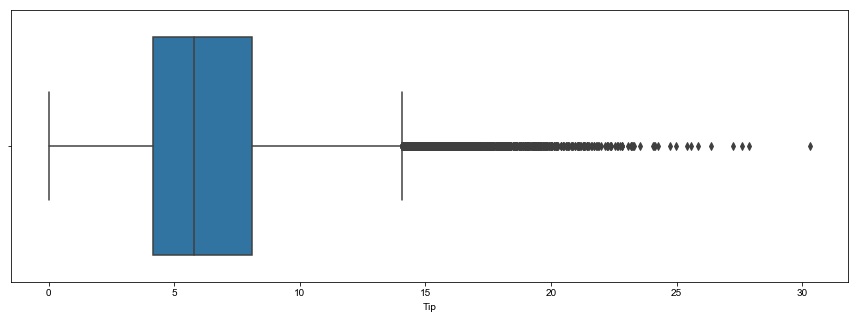

In [4]:
fig, axs = plt.subplots(figsize=(15,5))
sns.set_style('darkgrid')

sns.boxplot(bills_df['tip'], ax=axs)
axs.set(xlabel='Tip')


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


5.79904535048289
4.138255666000129
3.0123895131937357
2.3511657023469317


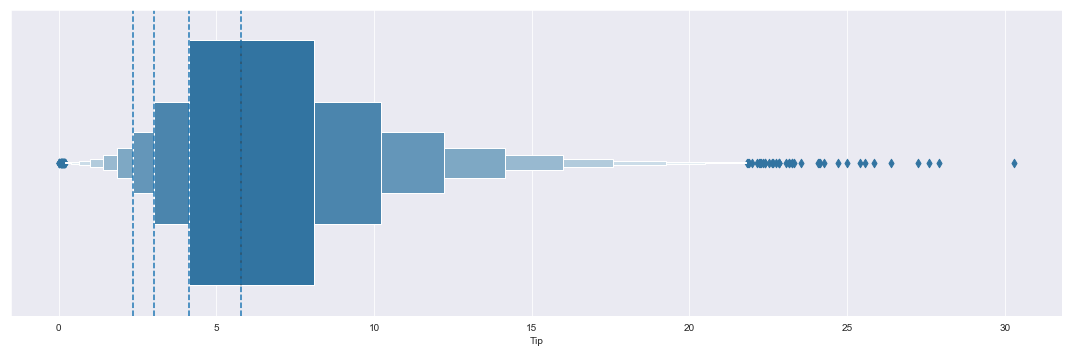

In [10]:
fig, axs = plt.subplots(figsize=(15,5))
sns.boxenplot(x=bills_df['tip'], ax=axs)
axs.set(xlabel='Tip')
plt.tight_layout()

print(np.percentile(bills_df['tip'], 50))
print(np.percentile(bills_df['tip'], 25))
print(np.percentile(bills_df['tip'], 12.5))
print(np.percentile(bills_df['tip'], 6.25))

for x in [50, 25, 12.5, 6.25]:
    axs.axvline(np.percentile(bills_df['tip'], x), linestyle='--')
    

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


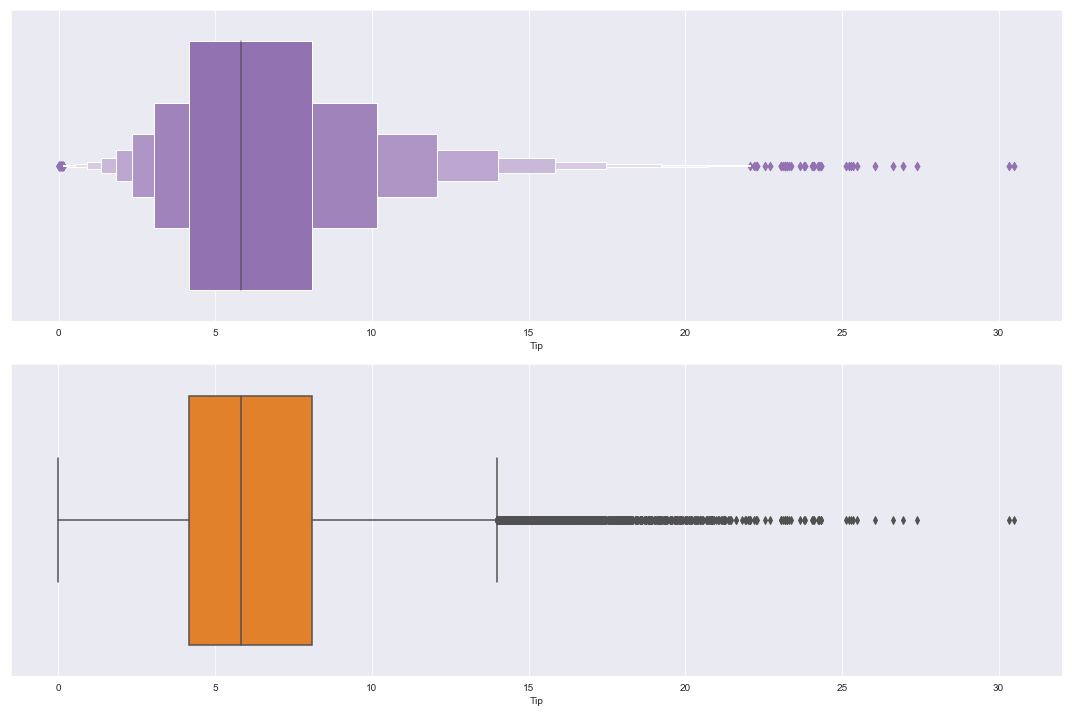

In [16]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(15,10))
sns.set_style('darkgrid')

sns.boxplot(bills_df['tip'], ax=axs[1], color='C1')
axs[1].set(xlabel='Tip')

sns.boxenplot(x=bills_df['tip'], ax=axs[0], color='C4')
axs[0].set(xlabel='Tip')
plt.tight_layout()


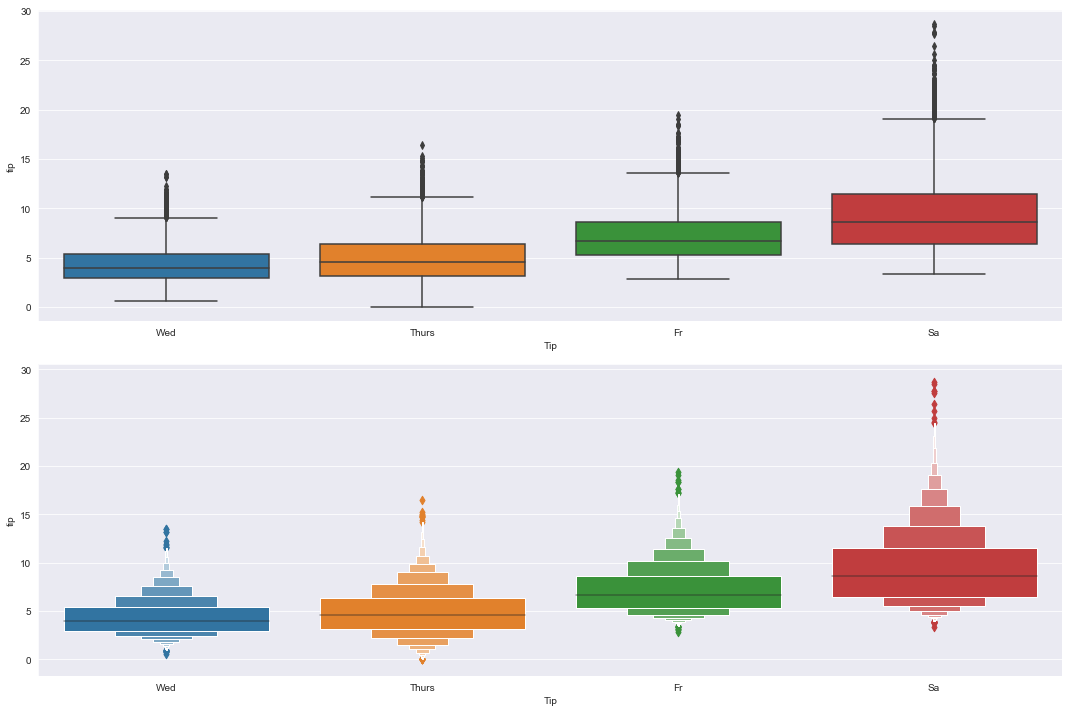

In [7]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(15,10))
sns.set_style('darkgrid')

sns.boxplot(y=bills_df['tip'], x=bills_df['day'], ax=axs[0])
axs[0].set(xlabel='Tip')

sns.boxenplot(y=bills_df['tip'], x=bills_df['day'], ax=axs[1])
axs[1].set(xlabel='Tip')

plt.tight_layout()


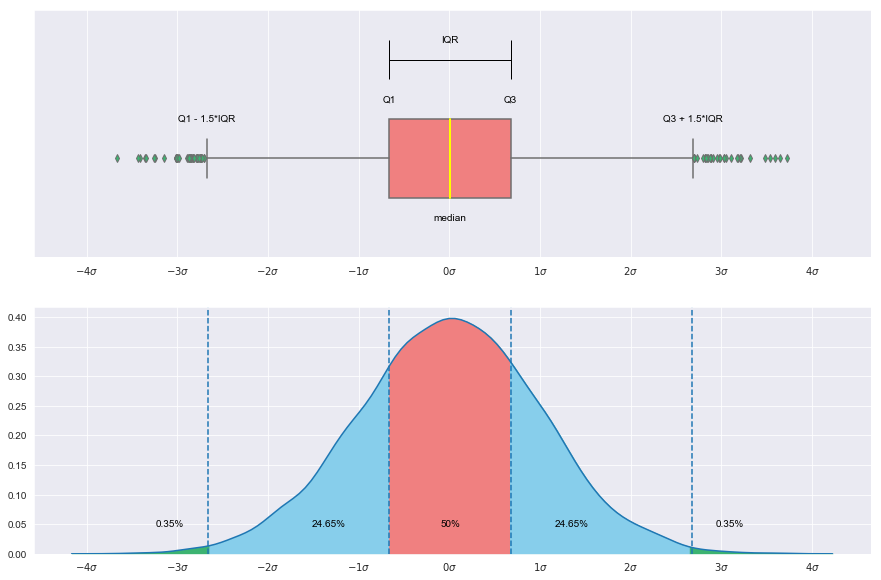

In [17]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

np.random.seed(10)
x = np.random.normal(0, 1, 10000)
mean = x.mean()
std = x.std()
q1, median, q3 = np.percentile(x, [25, 50, 75])
iqr = q3 - q1

fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True,figsize=(15,10))

medianprops = dict(linestyle='-', linewidth=2, color='yellow')
sns.boxplot(x=x, color='lightcoral', saturation=1, medianprops=medianprops,
            flierprops={'markerfacecolor': 'mediumseagreen'}, whis=1.5, ax=ax1)

ticks = [mean + std * i for i in range(-4, 5)]
ticklabels = [f'${i}\\sigma$' for i in range(-4, 5)]
ax1.set_xticks(ticks)
ax1.set_xticklabels(ticklabels)
ax1.set_yticks([])
ax1.tick_params(labelbottom=True)
ax1.set_ylim(-1, 1.5)
ax1.errorbar([q1, q3], [1, 1], yerr=[-0.2, 0.2], color='black', lw=1)
ax1.text(q1, 0.6, 'Q1', ha='center', va='center', color='black')
ax1.text(q3, 0.6, 'Q3', ha='center', va='center', color='black')
ax1.text(median, -0.6, 'median', ha='center', va='center', color='black')
ax1.text(median, 1.2, 'IQR', ha='center', va='center', color='black')
ax1.text(q1 - 1.5*iqr, 0.4, 'Q1 - 1.5*IQR', ha='center', va='center', color='black')
ax1.text(q3 + 1.5*iqr, 0.4, 'Q3 + 1.5*IQR', ha='center', va='center', color='black')
# ax1.vlines([q1 - 1.5*iqr, q1, q3, q3 + 1.5*iqr], 0, -2, color='darkgrey', ls=':', clip_on=False, zorder=0)

sns.kdeplot(x, ax=ax2)
kdeline = ax2.lines[0]
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()

ylims = ax2.get_ylim()
ax2.fill_between(xs, 0, ys, color='mediumseagreen')
ax2.fill_between(xs, 0, ys, where=(xs >= q1 - 1.5*iqr) & (xs <= q3 + 1.5*iqr), color='skyblue')
ax2.fill_between(xs, 0, ys, where=(xs >= q1) & (xs <= q3), color='lightcoral')
ax2.text(median, 0.05, '50%', ha='center', va='center', color='black')
ax2.text(q1 - 0.5*iqr, 0.05, '24.65%', ha='center', va='center', color='black')
ax2.text(q3 + 0.5*iqr, 0.05, '24.65%', ha='center', va='center', color='black')
ax2.text(q3 + 1.8*iqr, 0.05, '0.35%', ha='center', va='center', color='black')
ax2.text(q1 - 1.8*iqr, 0.05, '0.35%', ha='center', va='center', color='black')

ax2.axvline(q1, linestyle='--')
ax2.axvline(q3, linestyle='--')

ax2.axvline(q1 - 1.49*iqr, linestyle='--')
ax2.axvline(q3 + 1.49*iqr, linestyle='--')

# ax2.vlines([q1 - 1.5*iqr, q1, q3, q3 + 1.5*iqr], 0, 100, color='darkgrey', ls=':', zorder=0)
ax2.set_ylim(0, ylims[1])
plt.show()

